In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [23]:
df = pd.read_csv("AAME.csv")

In [24]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [26]:
df = df.drop(columns = ['Adj Close', 'Volume'])

In [27]:
df

,Date,Open,High,Low,Close
0,1980-03-17,0.00,4.05,3.85,3.85
1,1980-03-18,0.00,4.00,3.80,3.80
2,1980-03-19,0.00,4.05,3.85,3.85
3,1980-03-20,0.00,4.00,3.80,3.80
4,1980-03-21,0.00,3.95,3.75,3.75
...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28
10094,2020-03-27,2.25,2.25,2.21,2.25
10095,2020-03-30,2.25,2.25,2.13,2.13
10096,2020-03-31,2.11,2.11,2.11,2.11


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10098 non-null  object 
 1   Open    10098 non-null  float64
 2   High    10098 non-null  float64
 3   Low     10098 non-null  float64
 4   Close   10098 non-null  float64
dtypes: float64(4), object(1)
memory usage: 394.6+ KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Close만 추출해서 정규화
close_data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_data)

In [ ]:
# 시퀀스 생성 함수
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [ ]:
# 윈도우 크기 설정 및 훈련/테스트 나누기
window_size = 10
split = int(len(scaled_close) * 0.8)

train_data = scaled_close[:split]
test_data = scaled_close[split - window_size:]  # overlap for window

X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

In [ ]:
# 모델 정의
model = Sequential([
    SimpleRNN(64, input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0014 - val_loss: 1.0527e-04
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1376e-05 - val_loss: 4.6398e-05
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.6973e-05 - val_loss: 4.6041e-05
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2978e-05 - val_loss: 6.0377e-05
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0465e-04 - val_loss: 4.4139e-05
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2828e-05 - val_loss: 4.0454e-05
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2735e-05 - val_loss: 6.9877e-05
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7691e-05 - val_loss: 4.2191e-05
Epoch 9/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7959e-05 - val_loss: 3.9571e-05
Epoch 10/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8225e-05 - val_loss: 4.0515e-05


In [ ]:
# 예측 및 역변환
predicted = model.predict(X_test)
predicted_rescaled = scaler.inverse_transform(predicted)
y_test_rescaled = scaler.inverse_transform(y_test)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [35]:
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)
real_test = scaler.inverse_transform(y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# 성능 평가
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predicted_rescaled))
print("Test RMSE:", rmse)

Test RMSE: 0.0977841590781119


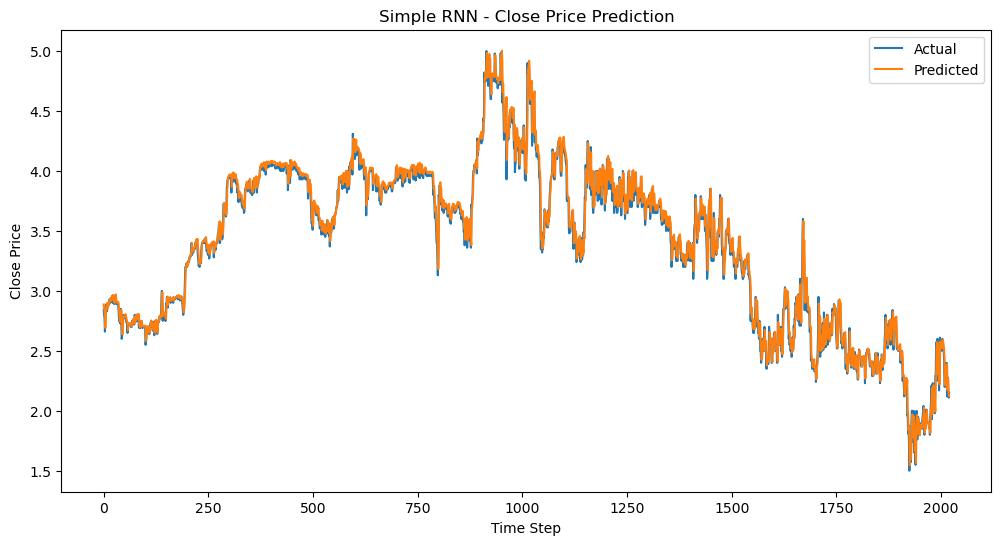

In [ ]:
#  시각화
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predicted_rescaled, label='Predicted')
plt.legend()
plt.title('Simple RNN - Close Price Prediction')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.show()